## Importing Libraries

In [1]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns  

## Loading the CSV file 

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\PYTHON FILES\Deep_Learning\Assignments & Projects\Assignment 4\Multiple CSV\8.twospirals.csv",header=None) 
df.head()  

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


## checking whether data is balanced or not

In [4]:
df[2].value_counts() 

0    1000
1    1000
Name: 2, dtype: int64

## checking outliers

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

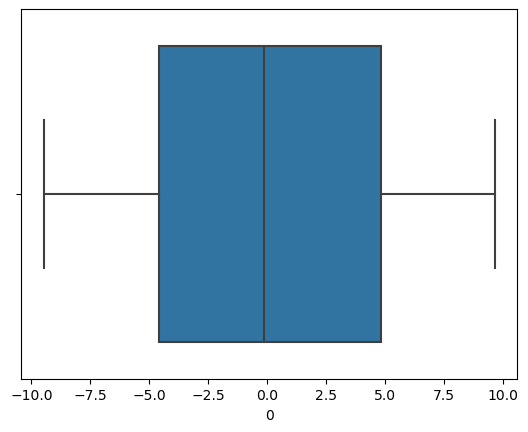

In [5]:
sns.boxplot(df[0])  

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

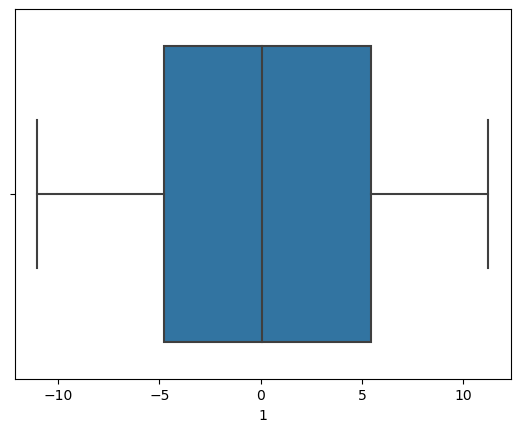

In [6]:
sns.boxplot(df[1])  

## Identifying  input and output features

In [7]:
x=df[[0,1]] 
y=df[2].astype(int) 

In [8]:
x.head()  

,0,1
0,-2.543456,-10.816358
1,9.434466,-2.572000
2,3.368646,-10.194671
3,1.341407,-4.204140
4,9.547758,-2.220580


In [9]:
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: 2, dtype: int32

## Spliting the data into train and test

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)   

In [11]:
x_train.shape 

(1600, 2)

In [12]:
x_test.shape  

(400, 2)

## Standardising input features

In [13]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

## Build the Logical Structure 

In [14]:
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD

In [15]:
model=Sequential()
model.add(Dense(16,activation="relu",input_dim=2))
model.add(Dense(10,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid")) 

In [16]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 291 (1.14 KB)
Trainable params: 291 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=50,epochs=450,validation_split=0.1)  

Epoch 1/450
29/29 [==============================] - 1s 16ms/step - loss: 0.6704 - accuracy: 0.6014 - val_loss: 0.6776 - val_accuracy: 0.5500
Epoch 2/450
29/29 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6049 - val_loss: 0.6739 - val_accuracy: 0.5562
Epoch 3/450
29/29 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.6056 - val_loss: 0.6704 - val_accuracy: 0.5562
Epoch 4/450
29/29 [==============================] - 0s 6ms/step - loss: 0.6587 - accuracy: 0.6076 - val_loss: 0.6670 - val_accuracy: 0.5500
Epoch 5/450
29/29 [==============================] - 0s 7ms/step - loss: 0.6552 - accuracy: 0.6111 - val_loss: 0.6637 - val_accuracy: 0.5375
Epoch 6/450
29/29 [==============================] - 0s 7ms/step - loss: 0.6518 - accuracy: 0.6153 - val_loss: 0.6608 - val_accuracy: 0.5312
Epoch 7/450
29/29 [==============================] - 0s 7ms/step - loss: 0.6487 - accuracy: 0.6215 - val_loss: 0.6582 - val_accuracy: 0.5625
Epoch 8/450


Epoch 59/450
29/29 [==============================] - 0s 8ms/step - loss: 0.6104 - accuracy: 0.6736 - val_loss: 0.6224 - val_accuracy: 0.6625
Epoch 60/450
29/29 [==============================] - 0s 11ms/step - loss: 0.6103 - accuracy: 0.6736 - val_loss: 0.6222 - val_accuracy: 0.6625
Epoch 61/450
29/29 [==============================] - 0s 7ms/step - loss: 0.6101 - accuracy: 0.6736 - val_loss: 0.6221 - val_accuracy: 0.6625
Epoch 62/450
29/29 [==============================] - 0s 8ms/step - loss: 0.6100 - accuracy: 0.6743 - val_loss: 0.6220 - val_accuracy: 0.6625
Epoch 63/450
29/29 [==============================] - 0s 8ms/step - loss: 0.6098 - accuracy: 0.6743 - val_loss: 0.6218 - val_accuracy: 0.6625
Epoch 64/450
29/29 [==============================] - 0s 12ms/step - loss: 0.6097 - accuracy: 0.6722 - val_loss: 0.6217 - val_accuracy: 0.6687
Epoch 65/450
29/29 [==============================] - 0s 10ms/step - loss: 0.6095 - accuracy: 0.6750 - val_loss: 0.6215 - val_accuracy: 0.6687
Epo

29/29 [==============================] - 0s 6ms/step - loss: 0.6015 - accuracy: 0.6604 - val_loss: 0.6153 - val_accuracy: 0.6562
Epoch 117/450
29/29 [==============================] - 0s 6ms/step - loss: 0.6015 - accuracy: 0.6618 - val_loss: 0.6152 - val_accuracy: 0.6562
Epoch 118/450
29/29 [==============================] - 0s 6ms/step - loss: 0.6013 - accuracy: 0.6611 - val_loss: 0.6152 - val_accuracy: 0.6562
Epoch 119/450
29/29 [==============================] - 0s 6ms/step - loss: 0.6011 - accuracy: 0.6611 - val_loss: 0.6150 - val_accuracy: 0.6562
Epoch 120/450
29/29 [==============================] - 0s 6ms/step - loss: 0.6009 - accuracy: 0.6618 - val_loss: 0.6148 - val_accuracy: 0.6562
Epoch 121/450
29/29 [==============================] - 0s 6ms/step - loss: 0.6008 - accuracy: 0.6604 - val_loss: 0.6147 - val_accuracy: 0.6562
Epoch 122/450
29/29 [==============================] - 0s 6ms/step - loss: 0.6007 - accuracy: 0.6618 - val_loss: 0.6144 - val_accuracy: 0.6562
Epoch 123/450

29/29 [==============================] - 0s 6ms/step - loss: 0.5924 - accuracy: 0.6438 - val_loss: 0.6076 - val_accuracy: 0.6187
Epoch 174/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5923 - accuracy: 0.6431 - val_loss: 0.6073 - val_accuracy: 0.6187
Epoch 175/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5921 - accuracy: 0.6410 - val_loss: 0.6073 - val_accuracy: 0.6187
Epoch 176/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5919 - accuracy: 0.6431 - val_loss: 0.6072 - val_accuracy: 0.6187
Epoch 177/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5917 - accuracy: 0.6444 - val_loss: 0.6070 - val_accuracy: 0.6187
Epoch 178/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5914 - accuracy: 0.6444 - val_loss: 0.6066 - val_accuracy: 0.6187
Epoch 179/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5913 - accuracy: 0.6431 - val_loss: 0.6063 - val_accuracy: 0.6187
Epoch 180/450

29/29 [==============================] - 0s 6ms/step - loss: 0.5504 - accuracy: 0.6201 - val_loss: 0.5540 - val_accuracy: 0.6438
Epoch 231/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5478 - accuracy: 0.6285 - val_loss: 0.5513 - val_accuracy: 0.6438
Epoch 232/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5452 - accuracy: 0.6340 - val_loss: 0.5485 - val_accuracy: 0.6562
Epoch 233/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5425 - accuracy: 0.6354 - val_loss: 0.5454 - val_accuracy: 0.6687
Epoch 234/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5397 - accuracy: 0.6431 - val_loss: 0.5425 - val_accuracy: 0.6812
Epoch 235/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5367 - accuracy: 0.6472 - val_loss: 0.5395 - val_accuracy: 0.7000
Epoch 236/450
29/29 [==============================] - 0s 6ms/step - loss: 0.5338 - accuracy: 0.6569 - val_loss: 0.5368 - val_accuracy: 0.7000
Epoch 237/450

29/29 [==============================] - 0s 6ms/step - loss: 0.3434 - accuracy: 0.8264 - val_loss: 0.3530 - val_accuracy: 0.7875
Epoch 288/450
29/29 [==============================] - 0s 6ms/step - loss: 0.3394 - accuracy: 0.8347 - val_loss: 0.3489 - val_accuracy: 0.7875
Epoch 289/450
29/29 [==============================] - 0s 6ms/step - loss: 0.3355 - accuracy: 0.8479 - val_loss: 0.3459 - val_accuracy: 0.8125
Epoch 290/450
29/29 [==============================] - 0s 6ms/step - loss: 0.3315 - accuracy: 0.8618 - val_loss: 0.3422 - val_accuracy: 0.8250
Epoch 291/450
29/29 [==============================] - 0s 6ms/step - loss: 0.3278 - accuracy: 0.8681 - val_loss: 0.3386 - val_accuracy: 0.8313
Epoch 292/450
29/29 [==============================] - 0s 6ms/step - loss: 0.3241 - accuracy: 0.8701 - val_loss: 0.3359 - val_accuracy: 0.8562
Epoch 293/450
29/29 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.8924 - val_loss: 0.3325 - val_accuracy: 0.8500
Epoch 294/450

29/29 [==============================] - 0s 6ms/step - loss: 0.2134 - accuracy: 0.9292 - val_loss: 0.2469 - val_accuracy: 0.8875
Epoch 345/450
29/29 [==============================] - 0s 5ms/step - loss: 0.2124 - accuracy: 0.9292 - val_loss: 0.2462 - val_accuracy: 0.8875
Epoch 346/450
29/29 [==============================] - 0s 6ms/step - loss: 0.2114 - accuracy: 0.9292 - val_loss: 0.2455 - val_accuracy: 0.8875
Epoch 347/450
29/29 [==============================] - 0s 6ms/step - loss: 0.2105 - accuracy: 0.9292 - val_loss: 0.2451 - val_accuracy: 0.8875
Epoch 348/450
29/29 [==============================] - 0s 6ms/step - loss: 0.2096 - accuracy: 0.9292 - val_loss: 0.2440 - val_accuracy: 0.8875
Epoch 349/450
29/29 [==============================] - 0s 6ms/step - loss: 0.2087 - accuracy: 0.9299 - val_loss: 0.2435 - val_accuracy: 0.8875
Epoch 350/450
29/29 [==============================] - 0s 6ms/step - loss: 0.2078 - accuracy: 0.9299 - val_loss: 0.2430 - val_accuracy: 0.8875
Epoch 351/450

29/29 [==============================] - 0s 10ms/step - loss: 0.1799 - accuracy: 0.9299 - val_loss: 0.2196 - val_accuracy: 0.8938
Epoch 402/450
29/29 [==============================] - 0s 9ms/step - loss: 0.1796 - accuracy: 0.9299 - val_loss: 0.2193 - val_accuracy: 0.8938
Epoch 403/450
29/29 [==============================] - 0s 9ms/step - loss: 0.1793 - accuracy: 0.9299 - val_loss: 0.2191 - val_accuracy: 0.8938
Epoch 404/450
29/29 [==============================] - 0s 11ms/step - loss: 0.1790 - accuracy: 0.9299 - val_loss: 0.2187 - val_accuracy: 0.8938
Epoch 405/450
29/29 [==============================] - 0s 13ms/step - loss: 0.1786 - accuracy: 0.9299 - val_loss: 0.2183 - val_accuracy: 0.8938
Epoch 406/450
29/29 [==============================] - 0s 8ms/step - loss: 0.1783 - accuracy: 0.9299 - val_loss: 0.2177 - val_accuracy: 0.8938
Epoch 407/450
29/29 [==============================] - 0s 8ms/step - loss: 0.1780 - accuracy: 0.9299 - val_loss: 0.2175 - val_accuracy: 0.8938
Epoch 408/

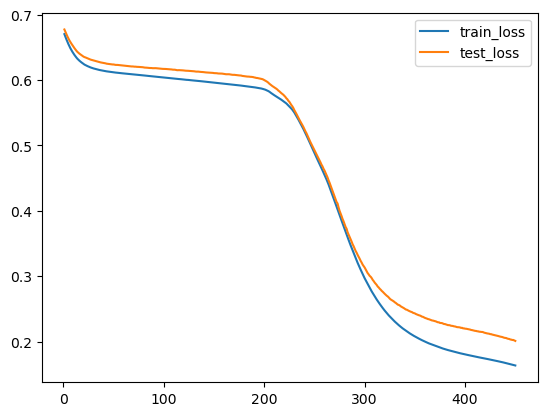

In [19]:
plt.plot(range(1,451),history.history["loss"],label="train_loss")
plt.plot(range(1,451),history.history["val_loss"],label="test_loss") 
plt.legend()

## Predicting the model

In [20]:
predicted=model.predict(x_test) 
predicted 

13/13 [==============================] - 0s 3ms/step


array([[9.89419460e-01],
       [3.24860611e-03],
       [2.58217037e-01],
       [9.99186516e-01],
       [2.04719650e-03],
       [9.90779877e-01],
       [9.93594468e-01],
       [9.93865728e-01],
       [9.89105999e-01],
       [2.65667051e-01],
       [9.68472242e-01],
       [9.98347640e-01],
       [2.60237783e-01],
       [9.97655571e-01],
       [2.59761333e-01],
       [7.29219839e-02],
       [9.99516964e-01],
       [1.93635508e-01],
       [8.76074284e-02],
       [9.96314287e-01],
       [1.03265382e-01],
       [9.99242902e-01],
       [2.61482388e-01],
       [3.63321565e-02],
       [9.97439742e-01],
       [2.96104044e-01],
       [2.58217037e-01],
       [9.93042707e-01],
       [9.79968369e-01],
       [9.79743659e-01],
       [9.98649001e-01],
       [9.97855425e-01],
       [9.96220887e-01],
       [9.89093661e-01],
       [9.98007238e-01],
       [2.65816659e-01],
       [6.60257600e-03],
       [9.73123729e-01],
       [2.58217037e-01],
       [3.03687342e-03],


In [21]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
    

## Evaluating the model

0.9525


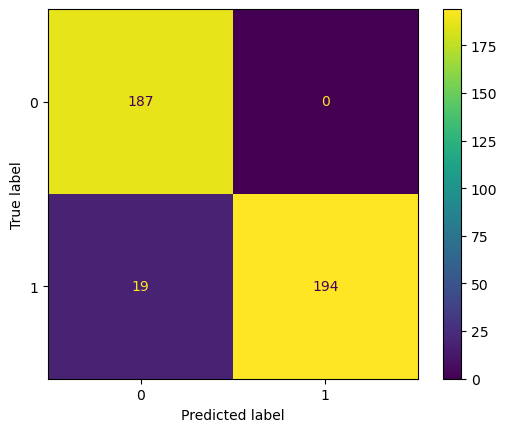

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

## PLOTING THE DECISION SURFACE

In [23]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 25s 3ms/step


<AxesSubplot:>

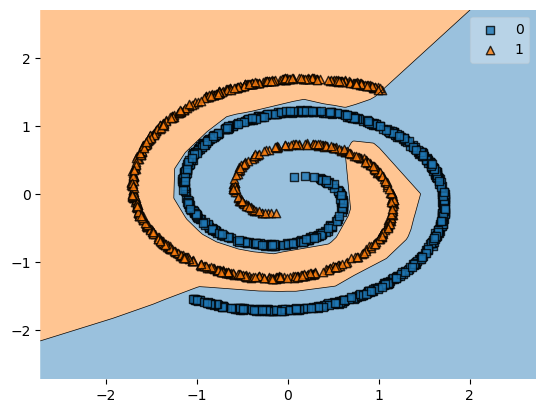

In [24]:
# Decision surface for Train data
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot:>

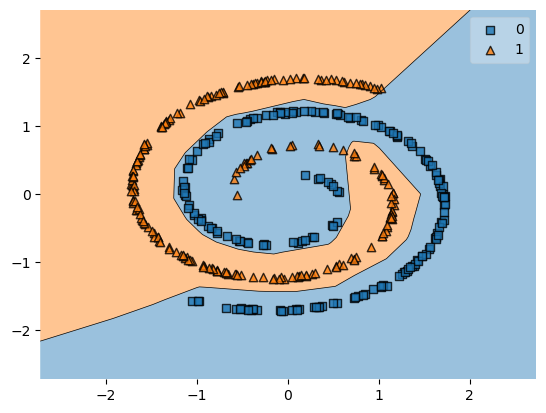

In [25]:
# Decision Surface for test data
plot_decision_regions(x_test,y_test.values,clf=model)  

## Conclusions:

###### This neural network model achieves an accuracy of 96%. The model architecture consists of 2 hidden layers with the following specifications:

- In the first hidden layer, there are 16 neurons with the ReLU activation function.
- In the second hidden layer, there are 10 neurons with the ReLU activation function.
- In the third hidden layer, there are 6 neurons with the ReLU activation function.

- The output layer uses the sigmoid activation function.

#### Overall, this neural network model architecture and training configuration achieve an accuracy of 96%.   
